 # HW 7

    Name: Trisha Mandal            Github username: trish11953             USC ID:1449602587

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.io as sio
import statsmodels.api as sm
from sklearn.svm import SVC
import math
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, hamming_loss
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
import warnings
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')

# 1. Multi-class and Multi-Label Classification Using Support Vector Machines


(a) Download the Anuran Calls (MFCCs) Data Set. Choose 70% of the data randomly as the training set. 

In [2]:
df = pd.read_csv('../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv')
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [95]:
trainingdata, testingdata = df.iloc[:, :22], df.iloc[:, 22:25]
xtrain, xtest, ytrain, ytest = train_test_split(trainingdata, testingdata, test_size=0.3, random_state=1)

(b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance).

i. Research exact match and hamming score/ loss methods for evaluating multi- label classification and use them in evaluating the classifiers in this problem.

Ans:

1. Exact Match Ratio (EMR)

2. Hamming Loss

3. Example-Based Accuracy

4. 1/0 Loss

5. Label Based Metrics

reference: https://medium.datadriveninvestor.com/a-survey-of-evaluation-metrics-for-multilabel-classification-bb16e8cd41cd

ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation.1 You are welcome to try to solve the problem with both standardized 2 and raw attributes and report the results.

In [12]:
ytrainfamily, ytraingenus, ytrainspecies = ytrain['Family'], ytrain['Genus'], ytrain['Species']
ytestfamily, ytestgenus, ytestspecies = ytest['Family'], ytest['Genus'], ytest['Species']

In [51]:
#references: https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
# https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/
# https://towardsdatascience.com/support-vector-machine-simply-explained-fee28eba5496
#https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

svm = SVC(kernel='rbf')
svmodel = OneVsRestClassifier(svm)
param_grid = {'estimator__gamma':np.linspace(0.1, 2, 20), 'estimator__C':np.logspace(-1, 4, 20)}
gridcv = GridSearchCV(svmodel, param_grid, cv=KFold(10))

In [37]:
fammod= gridcv.fit(xtrain, ytrainfamily)
print('SVM Penalty for label Family:', fammod.best_params_['estimator__C'])
print('Width of Gaussian Kernel for label Family:', fammod.best_params_['estimator__gamma'])

SVM Penalty for label Family: 42.81332398719391
Width of Gaussian Kernel for label Family: 2.0


In [60]:
#reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html
fampred= fammod.predict(xtest)
gaussfamloss = hamming_loss(ytestfamily, fampred)
print("Hamming Loss (Family): ", gaussfamloss)

Hamming Loss (Family):  1.0


In [41]:
genusmod= gridcv.fit(xtrain, ytraingenus)
print('SVM Penalty for label Genus:', genusmod.best_params_['estimator__C'])
print('Width of Gaussian Kernel for label Genus:', genusmod.best_params_['estimator__gamma'])

SVM Penalty for label Genus: 12.742749857031335
Width of Gaussian Kernel for label Genus: 2.0


In [58]:
genuspred= genusmod.predict(xtest)
gaussgenloss = hamming_loss(ytestgenus, genuspred)
print("Hamming Loss (Genus): ", gaussgenloss)

Hamming Loss (Genus):  0.010653080129689671


In [52]:
speciesmod= gridcv.fit(xtrain, ytrainspecies)
print('SVM Penalty for label Species:', speciesmod.best_params_['estimator__C'])
print('Width of Gaussian Kernel for label Species:', speciesmod.best_params_['estimator__gamma'])

SVM Penalty for label Species: 78.47599703514607
Width of Gaussian Kernel for label Species: 1.8


In [59]:
speciespred= speciesmod.predict(xtest)
gaussspeloss = hamming_loss(ytestspecies, speciespred)
print("Hamming Loss (Species): ", gaussspeloss)

Hamming Loss (Species):  0.008800370541917554


iii. Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [78]:
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
# https://scikit-learn.org/stable/auto_examples/svm/plot_svm_scale_c.html
l1mod = Pipeline([('scale', StandardScaler()), ('SVC',LinearSVC(penalty='l1', loss="squared_hinge", dual=False, tol=1e-3))])
param_grid = {'SVC__C':np.arange(0.01,100,10)}
gridcv = GridSearchCV(l1mod, param_grid, cv=KFold(10))

In [79]:
fammod = gridcv.fit(xtrain, ytrainfamily)
print('SVM Penalty for label Family:', fammod.best_params_['SVC__C'])

SVM Penalty for label Family: 10.01


In [80]:
fampred= fammod.predict(xtest)
l1famloss = hamming_loss(ytestfamily, fampred)
print("Hamming Loss (Family): ", l1famloss)

Hamming Loss (Family):  0.0666975451597962


In [81]:
genusmod= gridcv.fit(xtrain, ytraingenus)
print('SVM Penalty for label Genus:', genusmod.best_params_['SVC__C'])

SVM Penalty for label Genus: 90.01


In [82]:
genuspred= genusmod.predict(xtest)
l1genloss = hamming_loss(ytestgenus, genuspred)
print("Hamming Loss (Genus): ", l1genloss)

Hamming Loss (Genus):  0.052802223251505326


In [83]:
speciesmod= gridcv.fit(xtrain, ytrainspecies)
print('SVM Penalty for label Species:', speciesmod.best_params_['SVC__C'])

SVM Penalty for label Species: 10.01


In [84]:
speciespred= speciesmod.predict(xtest)
l1speloss = hamming_loss(ytestspecies, speciespred)
print("Hamming Loss (Species): ", l1speloss)

Hamming Loss (Species):  0.042612320518758684


iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [88]:
l1mod = Pipeline([('scale', StandardScaler()), ('SVC',LinearSVC(penalty='l1', loss="squared_hinge", dual=False, tol=1e-3))])
param_grid = {'SVC__C':np.arange(0.01,100,10)}
gridcv = GridSearchCV(l1mod, param_grid, cv=KFold(10))

In [89]:
sm = SMOTE(random_state = 2)
smotextrain, smoteytrain = sm.fit_resample(xtrain, ytrainfamily)
fammod = gridcv.fit(smotextrain, smoteytrain)
print('SVM Penalty for label Family:', fammod.best_params_['SVC__C'])

SVM Penalty for label Family: 60.01


In [90]:
fampred= fammod.predict(xtest)
smotel1famloss = hamming_loss(ytestfamily, fampred)
print("Hamming Loss (Family): ", smotel1famloss)

Hamming Loss (Family):  0.07318202871699861


In [91]:
sm = SMOTE(random_state = 2)
smotextrain, smoteytrain = sm.fit_resample(xtrain, ytraingenus)
genusmod= gridcv.fit(smotextrain, smoteytrain)
print('SVM Penalty for label Genus:', genusmod.best_params_['SVC__C'])

SVM Penalty for label Genus: 90.01


In [92]:
genuspred= genusmod.predict(xtest)
smotel1genloss = hamming_loss(ytestgenus, genuspred)
print("Hamming Loss (Genus): ", smotel1genloss)

Hamming Loss (Genus):  0.07688744789254284


In [93]:
sm = SMOTE(random_state = 2)
smotextrain, smoteytrain = sm.fit_resample(xtrain, ytrainspecies)
speciesmod= gridcv.fit(smotextrain, smoteytrain)
print('SVM Penalty for label Species:', speciesmod.best_params_['SVC__C'])

SVM Penalty for label Species: 80.01


In [94]:
speciespred= speciesmod.predict(xtest)
smotel1speloss = hamming_loss(ytestspecies, speciespred)
print("Hamming Loss (Species): ", smotel1speloss)

Hamming Loss (Species):  0.04863362667901806


In [97]:
multi = pd.DataFrame([[gaussfamloss, gaussgenloss, gaussspeloss], [l1famloss,l1genloss,l1speloss],
                    [smotel1famloss,smotel1genloss,smotel1speloss]],
                    index=["Gaussian Kernel SVM Model","L1 penalized SVM Model ","SMOTE L1 penalized SVM Model"],
                    columns=["Hamming loss Family", "Hamming loss Genus", "Hamming loss Species"])
multi

,Hamming loss Family,Hamming loss Genus,Hamming loss Species
Gaussian Kernel SVM Model,1.000000,0.010653,0.008800
L1 penalized SVM Model,0.066698,0.052802,0.042612
SMOTE L1 penalized SVM Model,0.073182,0.076887,0.048634


Comparing the hamming loses for the 3 labels in the models, L1 penalized SVM model seems to be the best model out of the 3. 

# 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

Monte-Carlo Simulation: Perform the following procedures 50 times, and report
the average and standard deviation of the 50 Hamming Distances that you calculate.

(a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

In [3]:
xdata, ydata = df.iloc[:,:-4], df.iloc[:,22:25]

In [8]:
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.htmlhttps://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
kscore = [0,0] 
for k in [*range(2,51)]:
    kmeansmod = KMeans(n_clusters = k, tol = 0.1)
    kmeansmod = kmeansmod.fit(xdata)
    cluster = kmeansmod.labels_
    silscore = silhouette_score(xdata, cluster)
    if kscore[1] < silscore: 
        kscore = [k,silscore]
print("The best k: {} and its sihouette score is {}".format(kscore[0], kscore[1]))

The best k: 4 and its sihouette score is 0.38526492536731705


(b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

In [9]:
# reference: https://stackoverflow.com/questions/15222754/groupby-pandas-dataframe-and-select-most-common-value
kmeansmod= KMeans(n_clusters=kscore[0])
kmeansmod = kmeansmod.fit(xdata)
cluster = kmeansmod.predict(xdata)
ydata["label"] = cluster
famfrequency = ydata.groupby("label")["Family"].agg(pd.Series.mode)
print("Majority labels in class Family")
famfrequency

Majority labels in class Family


label
0            Hylidae
1    Leptodactylidae
2            Hylidae
3      Dendrobatidae
Name: Family, dtype: object

In [10]:
kmeansmod= KMeans(n_clusters=kscore[0])
kmeansmod = kmeansmod.fit(xdata)
cluster = kmeansmod.predict(xdata)
ydata["label"] = cluster
genusfrequency = ydata.groupby("label")["Genus"].agg(pd.Series.mode)
print("Majority labels in class Genus")
genusfrequency

Majority labels in class Genus


label
0     Ameerega
1    Hypsiboas
2    Adenomera
3    Hypsiboas
Name: Genus, dtype: object

In [11]:
kmeansmod= KMeans(n_clusters=kscore[0])
kmeansmod = kmeansmod.fit(xdata)
cluster = kmeansmod.predict(xdata)
ydata["label"] = cluster
speciesfrequency = ydata.groupby("label")["Species"].agg(pd.Series.mode)
print("Majority labels in class Species")
speciesfrequency

Majority labels in class Species


label
0    AdenomeraHylaedactylus
1        Ameeregatrivittata
2      HypsiboasCinerascens
3         HypsiboasCordobae
Name: Species, dtype: object

(c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

In [30]:
# references: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html
# https://numpy.org/doc/stable/reference/routines.math.html

yfamily, ygenus, yspecies  = ydata['Family'], ydata['Genus'], ydata['Species']
hammingdist = []
for i in range(50):
    cumulative, count1,count2, count3, maxfam, maxspecies, maxgenus = {}, {}, {}, {}, {}, {}, {} 
    silscores = []
    for kval in range(2, 50):
        kmeansmod = MiniBatchKMeans(n_clusters = kval)
        kmeansmod = kmeansmod.fit(xdata)
        cluster = kmeansmod.labels_
        silscore = silhouette_score(xdata, cluster)
        silscores.append(silscore)
        
    kmeans = KMeans(n_clusters=np.argmax(silscores)+2, random_state=1)
    kmeans = kmeans.fit(xdata)
    labels = kmeans.labels_
    le = len(labels)
    
    
    for j in range(np.argmax(silscores)+2):
        count1[j], maxfam[j] = [], []
    for j in range(np.argmax(silscores)+2):
        count2[j], maxgenus[j] = [], []
    for j in range(np.argmax(silscores)+2):
        count3[j], maxspecies[j] = [], []
        
    for k in range(le):
        count1[labels[k]].append(yfamily[k])
    for k in range(le):
        count2[labels[k]].append(ygenus[k])
    for k in range(le):
        count3[labels[k]].append(yspecies[k])
    
    for a in count1:
        maxfam[a] = max(count1[a],key=count1[a].count)  
    for a in count2:
        maxgenus[a] = max(count2[a],key=count2[a].count)
    for a in count3:
        maxspecies[a] = max(count3[a],key=count3[a].count)

    for b in range(np.argmax(silscores)+2):
        p1 = maxfam[b]
        p2 = maxgenus[b]
        p3 = maxspecies[b]
        cumulative[b] = [p1,p2,p3]
    
    yprediction = []
    for c in labels:
        yprediction.append(cumulative[c])

    yprediction = pd.DataFrame(data=yprediction, columns=['Family', 'Genus', 'Species'])
    denom = float(ydata.to_numpy().size)
    hammingscore = np.sum(np.equal(ydata.to_numpy(), yprediction.to_numpy()))/denom
    hammingloss = np.sum(np.not_equal(ydata.to_numpy(),  yprediction.to_numpy()))/denom
    hammingdistance = np.sum(np.not_equal(ydata.to_numpy(), yprediction.to_numpy()))
    print("Iteration ", i+1)
    print("Hamming Score: {}, Hamming Loss: {}, Hamming Distance: {} ".format(hammingscore, hammingloss, hammingdistance) )
    hammingdist.append(hammingdistance)
    

Iteration  1
Hamming Score: 0.8322446143154969, Hamming Loss: 0.16775538568450313, Hamming Distance: 3621 
Iteration  2
Hamming Score: 0.7775770210794534, Hamming Loss: 0.2224229789205467, Hamming Distance: 4801 
Iteration  3
Hamming Score: 0.7775770210794534, Hamming Loss: 0.2224229789205467, Hamming Distance: 4801 
Iteration  4
Hamming Score: 0.8322446143154969, Hamming Loss: 0.16775538568450313, Hamming Distance: 3621 
Iteration  5
Hamming Score: 0.8318276580959, Hamming Loss: 0.16817234190410008, Hamming Distance: 3630 
Iteration  6
Hamming Score: 0.7775770210794534, Hamming Loss: 0.2224229789205467, Hamming Distance: 4801 
Iteration  7
Hamming Score: 0.7775770210794534, Hamming Loss: 0.2224229789205467, Hamming Distance: 4801 
Iteration  8
Hamming Score: 0.8322446143154969, Hamming Loss: 0.16775538568450313, Hamming Distance: 3621 
Iteration  9
Hamming Score: 0.8318276580959, Hamming Loss: 0.16817234190410008, Hamming Distance: 3630 
Iteration  10
Hamming Score: 0.7775770210794534

In [32]:
mean = np.mean(hammingdist)
std = np.std(hammingdist)
print("Mean of the Hamming Distances: ", mean )
print("Standard Deviation of the Hamming Distances: ", std )

Mean of the Hamming Distances:  4523.22
Standard Deviation of the Hamming Distances:  886.0658280285952


# 3. ISLR 12.6.2

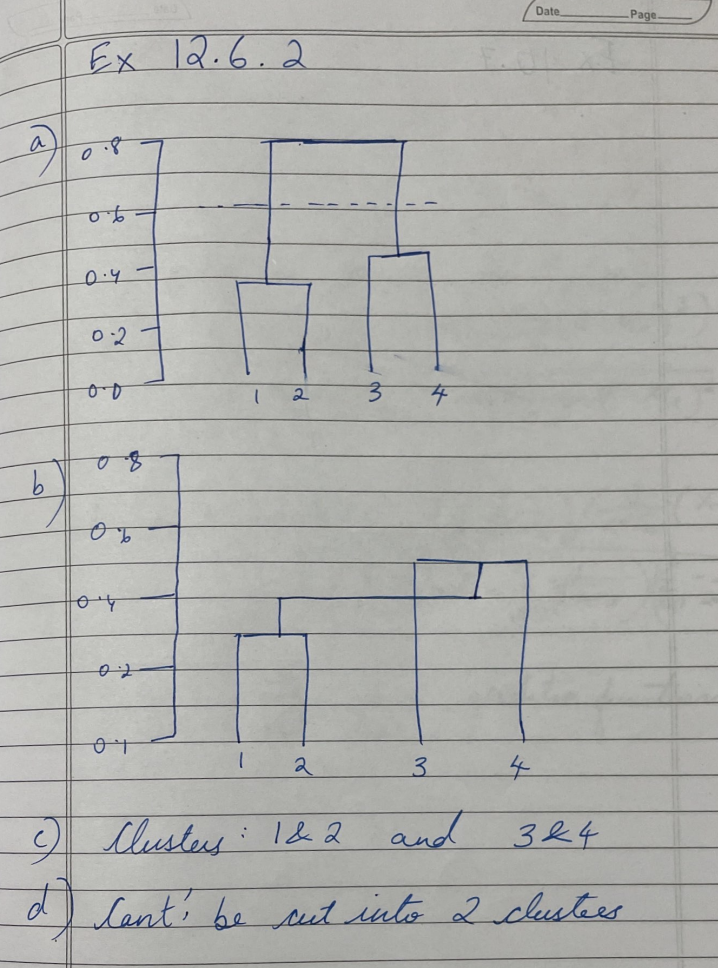

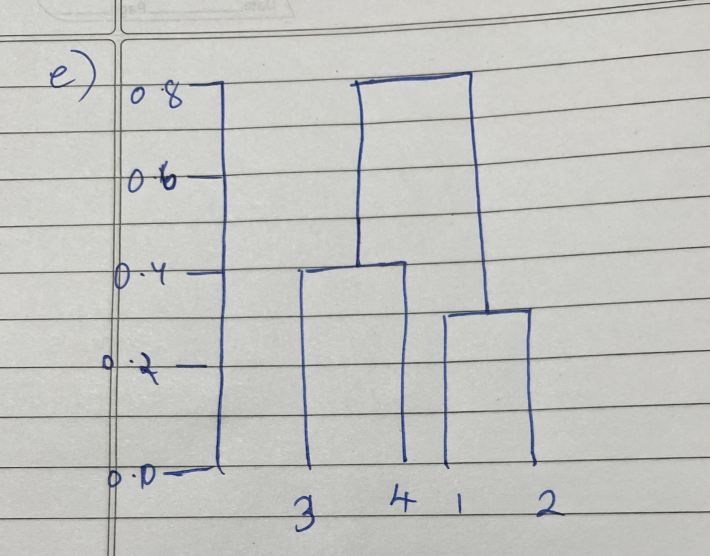

# References

https://medium.datadriveninvestor.com/a-survey-of-evaluation-metrics-for-multilabel-classification-bb16e8cd41cd

https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/

https://towardsdatascience.com/support-vector-machine-simply-explained-fee28eba5496

https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html

https://scikit-learn.org/stable/auto_examples/svm/plot_svm_scale_c.html

https://stackoverflow.com/questions/15222754/groupby-pandas-dataframe-and-select-most-common-value

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html

https://numpy.org/doc/stable/reference/routines.math.html
